# Statistical Testing

### Hypothesis Testing for Categorical Variables

1.  Is there a significant association between the vendorProject and the likelihood of a vulnerability being associated with a ransomware campaign?

2. Does the specific vulnerability type significantly influence the classification of a vulnerability as associated with a known ransomware campaign?

3. Does the dateAdded (or the age of the vulnerability) significantly affect the likelihood of being associated with a ransomware campaign?

4. Are certain products more likely to be associated with vulnerabilities targeted by ransomware campaigns?

5. Is there a significant difference in the likelihood of ransomware association among different types of vulnerabilities?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sys
sys.path.append("./util_")
import _utility

In [2]:
train = pd.read_csv("./data/01_original_clean_no_dummies_train.csv", index_col=0)
train.head(3)

,vendor_project,date_added,known_ransomware_campaign_use,vulnerability_type,required_action_new,product_category
848,Microsoft,2022-11-08,Known,Privilege Escalation Vulnerability,Apply Updates,Operating Systems
677,WebKitGTK,2022-05-23,Unknown,Memory Corruption Vulnerability,Apply Updates,Browsers
93,Google,2021-11-03,Unknown,Information Disclosure Vulnerability,Apply Updates,Browsers


**Confidence Level (Alpha)** 0.05 of 95% for all the tests in this study.

In [3]:
# Confidence Level (Alpha) ** 0.05 of 95%
alpha = 0.05

1. Is there a significant association between the vendorProject and the likelihood of a vulnerability being associated with a ransomware campaign?

    - Null Hypothesis (H₀): The vendorProject has no significant impact on whether a vulnerability is associated with a ransomware campaign.
    - Alternative Hypothesis (H₁):  The vendorProject has significant impact on whether a vulnerability is associated with a ransomware campaign.
  

**Contegency table**

In [4]:
value_percetange = train.vendor_project.value_counts(normalize=True)
for k,v in value_percetange.items():
    if v == value_percetange.max():
        print("The vendor_project with the largest percentage in the data is: ", k)
        print(f"Percentage in the data: {v * 100}%")

The vendor_project with the largest percentage in the data is:  Microsoft
Percentage in the data: 22.15477996965099%


In [5]:
cont_table =pd.crosstab(train.vendor_project, train.known_ransomware_campaign_use)
cont_table

known_ransomware_campaign_use,Known,Unknown
vendor_project,,
Accellion,2,0
Acronis,0,1
Adobe,4,32
Amcrest,0,1
Android,0,3
...,...,...
Zyxel,0,9
ownCloud,0,1
phpMyAdmin,0,1


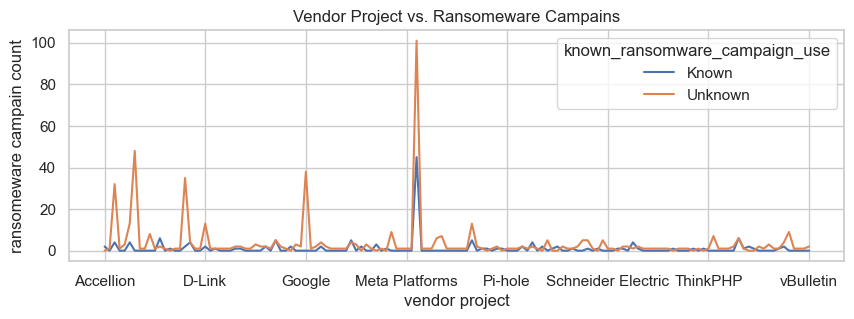

In [6]:
cont_table.plot(kind="line", figsize=(10,3))
plt.title("Vendor Project vs. Ransomeware Campains")
plt.ylabel("ransomeware campain count")
plt.xlabel("vendor project")
plt.show()

**Chi\^2 test**

In [7]:
# test stats
chi2, p_value, degreeFreedom, exp_table = stats.chi2_contingency(cont_table)

# print results
print("chi2:", chi2)
print("p-value:", p_value)
print("defrees of freedom:", degreeFreedom, "\n\n")

print(cont_table)
exp_table = pd.DataFrame(exp_table).astype(int)

chi2: 244.74653029953348
p-value: 1.0513745178481661e-07
defrees of freedom: 140 


known_ransomware_campaign_use  Known  Unknown
vendor_project                               
Accellion                          2        0
Acronis                            0        1
Adobe                              4       32
Amcrest                            0        1
Android                            0        3
...                              ...      ...
Zyxel                              0        9
ownCloud                           0        1
phpMyAdmin                         0        1
rConfig                            0        1
vBulletin                          0        2

[141 rows x 2 columns]


In [8]:
_utility.compare_pvalue_to_alpha(p_value, alpha)

(p_value < alpha) --> We have enough evidence to reject the null hypothesis!


2. Does the specific vulnerability type significantly influence the classification of a vulnerability as associated with a known ransomware campaign?

    - Null Hypothesis (H₀): The vulnerabilityName has no significant effect on whether a vulnerability is associated with a ransomware campaign.
    - Alternative Hypothesis (H₁): The vulnerabilityName significantly affects the likelihood of a vulnerability being associated with a ransomware campaign.

In [9]:
value_percetange = train.vulnerability_type.value_counts(normalize=True)
for k,v in value_percetange.items():
    if v == value_percetange.max():
        print("The vulnerability_type with the largest percentage in the data is: ", k)
        print(f"Percentage in the data: {v * 100}%")

The vulnerability_type with the largest percentage in the data is:  Remote Code Execution Vulnerability
Percentage in the data: 15.781487101669194%


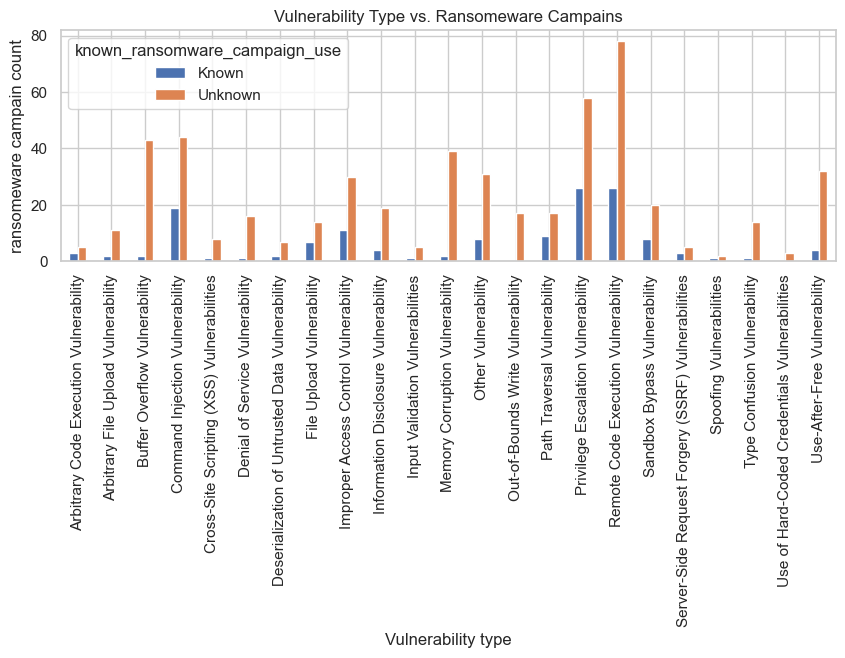

In [10]:
# Create a contegency table for testing
cont_table =pd.crosstab(train.vulnerability_type, train.known_ransomware_campaign_use)
cont_table.plot(kind="bar", figsize=(10,3))
plt.title("Vulnerability Type vs. Ransomeware Campains")
plt.ylabel("ransomeware campain count")
plt.xlabel("Vulnerability type")
plt.show()

In [11]:
# test stats
chi2, p_value, degreeFreedom, exp_table = stats.chi2_contingency(cont_table)

# print results
print("chi2:", chi2)
print("p-value:", p_value)
print("defrees of freedom:", degreeFreedom, "\n\n")

print(cont_table)
exp_table = pd.DataFrame(exp_table).astype(int)

chi2: 44.60244297436909
p-value: 0.0029796404717117907
defrees of freedom: 22 


known_ransomware_campaign_use                       Known  Unknown
vulnerability_type                                                
Arbitrary Code Execution Vulnerability                  3        5
Arbitrary File Upload Vulnerability                     2       11
Buffer Overflow Vulnerability                           2       43
Command Injection Vulnerability                        19       44
Cross-Site Scripting (XSS) Vulnerabilities              1        8
Denial of Service Vulnerability                         1       16
Deserialization of Untrusted Data Vulnerability         2        7
File Upload Vulnerability                               7       14
Improper Access Control Vulnerability                  11       30
Information Disclosure Vulnerability                    4       19
Input Validation Vulnerabilities                        1        5
Memory Corruption Vulnerability                 

In [12]:
_utility.compare_pvalue_to_alpha(p_value, alpha)

(p_value < alpha) --> We have enough evidence to reject the null hypothesis!


3. Does the dateAdded (or the age of the vulnerability) significantly affect the likelihood of being associated with a ransomware campaign?

    - Null Hypothesis (H₀): The dateAdded does not significantly impact the association of a vulnerability with a ransomware campaign.
    - Alternative Hypothesis (H₁): The dateAdded significantly impacts the likelihood of a vulnerability being associated with a ransomware campaign.

4. Are certain products more likely to be associated with vulnerabilities targeted by ransomware campaigns?

    - Null Hypothesis (H₀): The type of product has no significant effect on the likelihood of a vulnerability being associated with a ransomware campaign.
    - Alternative Hypothesis (H₁): Certain products are significantly more likely to be associated with vulnerabilities targeted by ransomware campaigns.

In [13]:
value_percetange = train.product_category.value_counts(normalize=True)
for k,v in value_percetange.items():
    if v == value_percetange.max():
        print("The product_category with the largest percentage in the data is: ", k)
        print(f"Percentage in the data: {v * 100}%")

The product_category with the largest percentage in the data is:  Operating Systems
Percentage in the data: 16.084977238239755%


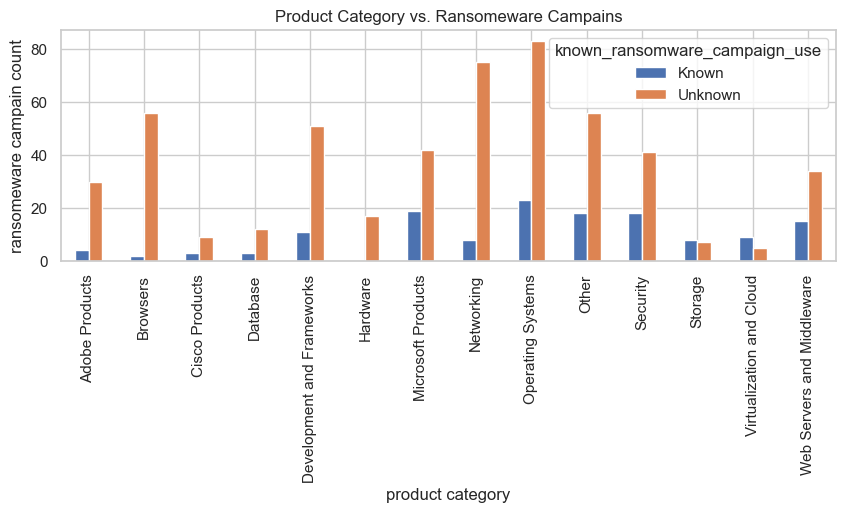

In [14]:
# Create a contegency table for testing
cont_table =pd.crosstab(train.product_category, train.known_ransomware_campaign_use)
cont_table.plot(kind="bar", figsize=(10,3))
plt.title("Product Category vs. Ransomeware Campains")
plt.ylabel("ransomeware campain count")
plt.xlabel("product category")
plt.show()

In [15]:
# test stats
chi2, p_value, degreeFreedom, exp_table = stats.chi2_contingency(cont_table)

# print results
print("chi2:", chi2)
print("p-value:", p_value)
print("defrees of freedom:", degreeFreedom, "\n\n")

print(cont_table)
exp_table = pd.DataFrame(exp_table).astype(int)

chi2: 58.66601459702949
p-value: 9.087425382171356e-08
defrees of freedom: 13 


known_ransomware_campaign_use  Known  Unknown
product_category                             
Adobe Products                     4       30
Browsers                           2       56
Cisco Products                     3        9
Database                           3       12
Development and Frameworks        11       51
Hardware                           0       17
Microsoft Products                19       42
Networking                         8       75
Operating Systems                 23       83
Other                             18       56
Security                          18       41
Storage                            8        7
Virtualization and Cloud           9        5
Web Servers and Middleware        15       34


In [16]:
_utility.compare_pvalue_to_alpha(p_value, alpha)

(p_value < alpha) --> We have enough evidence to reject the null hypothesis!


5. Is there a significant difference in the required actions association with different ransomeware campains?

    - Null Hypothesis (H₀): The type of action required does not significantly affect its association with ransomware campaigns.
    - Alternative Hypothesis (H₁): The type of action required significantly affect its association with ransomware campaigns.

In [17]:
value_percetange = train.required_action_new.value_counts(normalize=True)
for k,v in value_percetange.items():
    if v == value_percetange.max():
        print("The required_action with the largest percentage in the data is: ", k)
        print(f"Percentage in the data: {v * 100}%")

The required_action with the largest percentage in the data is:  Apply Updates
Percentage in the data: 76.32776934749621%


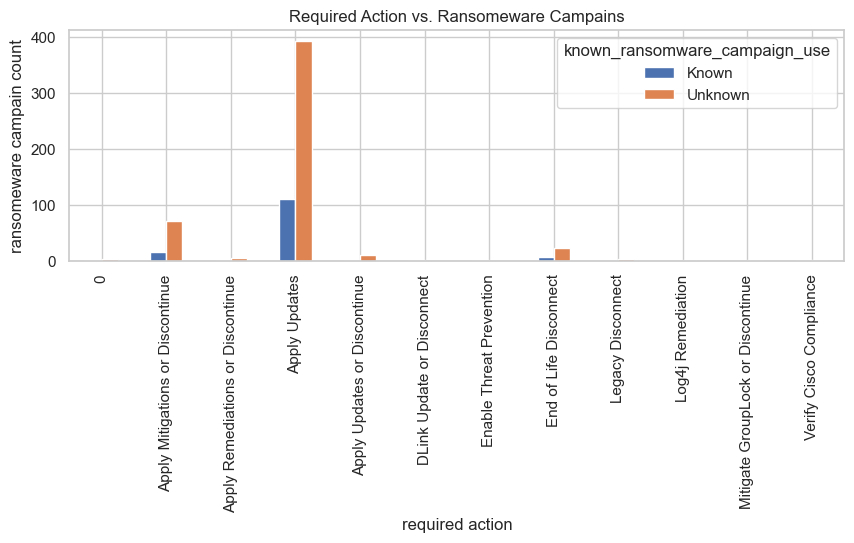

In [18]:
# Create a contegency table for testing
cont_table =pd.crosstab(train.required_action_new, train.known_ransomware_campaign_use)
cont_table.plot(kind="bar", figsize=(10,3))
plt.title("Required Action vs. Ransomeware Campains")
plt.ylabel("ransomeware campain count")
plt.xlabel("required action")
plt.show()

In [19]:
# test stats
chi2, p_value, degreeFreedom, exp_table = stats.chi2_contingency(cont_table)

# print results
print("chi2:", chi2)
print("p-value:", p_value)
print("defrees of freedom:", degreeFreedom, "\n\n")

print(cont_table)
exp_table = pd.DataFrame(exp_table).astype(int)

chi2: 12.08056645877351
p-value: 0.3576178793957384
defrees of freedom: 11 


known_ransomware_campaign_use      Known  Unknown
required_action_new                              
0                                      2        4
Apply Mitigations or Discontinue      16       72
Apply Remediations or Discontinue      2        5
Apply Updates                        110      393
Apply Updates or Discontinue           1       11
DLink Update or Disconnect             1        0
Enable Threat Prevention               1        0
End of Life Disconnect                 7       24
Legacy Disconnect                      0        4
Log4j Remediation                      0        1
Mitigate GroupLock or Discontinue      0        2
Verify Cisco Compliance                1        2


In [20]:
_utility.compare_pvalue_to_alpha(p_value, alpha)

(p_value => alpha) --> we fail to reject the null hypothesis at this time!


**What I see, what I know**


